In [18]:
import pandas as pa

In [63]:
data = {"Chiffre d'affaires": [220, 280, 250, 170, 150, 340, 310, 210, 180, 190],
"Frais publicitaires": [2.6, 2.6, 2.4, 1.5, 0.9, 3.0, 2.7, 2.3, 1.7, 1.9]}

df = pa.DataFrame(data)

df

,Chiffre d'affaires,Frais publicitaires
0,220,2.6
1,280,2.6
2,250,2.4
3,170,1.5
4,150,0.9
5,340,3.0
6,310,2.7
7,210,2.3
8,180,1.7
9,190,1.9


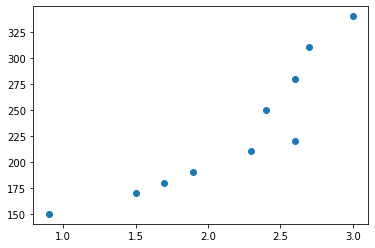

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

Y = data["Chiffre d'affaires"]
X = data["Frais publicitaires"]

plt.scatter(X, Y)

In [21]:
import numpy as np
# COEFficient de CORRélation linéaire.
np.corrcoef(X, Y)

array([[1.        , 0.89375779],
       [0.89375779, 1.        ]])

In [28]:
from scipy.stats import linregress

lr = linregress(X, Y) # LINear REGRESSion
lr

LinregressResult(slope=87.40701381509031, intercept=41.20085015940495, rvalue=0.8937577901006998, pvalue=0.0004894341749604697, stderr=15.50930060045945, intercept_stderr=34.825201199589735)

In [23]:
# Copy / Paste form cours_3-intro
beta_1 = np.sum((Y - np.average(Y))*(X - np.average(X))) / np.sum((X-np.average(X))*(X-np.average(X)))
beta_1 # slope

87.40701381509031

In [24]:
# Copy / Paste form cours_3-intro
beta_0 = np.average(Y) - beta_1 * np.average(X)
beta_0 # intercept

41.20085015940495

In [25]:
lr.rvalue # coefficient de determination // le poursentagen de relation entre x et y
lr.pvalue # le pourcentage d'erreur

0.0004894341749604697

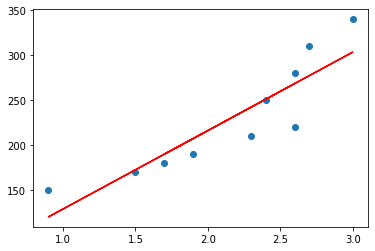

In [26]:
# Copy / Paste form cours_3-intro
plt.scatter(X, Y)
plt.plot(X, lr.intercept + lr.slope * np.array(X), 'r')
#  [beta_0 + beta_1 * X[i] for i in range(len(X))]

In [61]:
from scipy.stats import t # t-distribution
# df : Degrees of Freedom
# ppf : Percent Point Function
tinv = lambda probability, df: abs(t.ppf(probability/2, df))
#tinv : ?
ts = tinv(0.05, len(X)-2)
ts # ts : ?


2.306004135033371

Selon le theorem de la saucisse on vois que la significativité de la régression au risque 5% n'as pas de sens car la pvalue est a 0.0004 ? ou 2.3 ?

In [29]:
# C'est la rvalue
lr.rvalue

0.8937577901006998

In [65]:
beta_0 + beta_1 * 0.4 # pour 400 euro

76.16365568544109

In [66]:
beta_0 + beta_1 * 4 # pour 4000 euro

390.8289054197662